In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [173]:
df = pd.read_csv('diabetes.csv')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [175]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [176]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


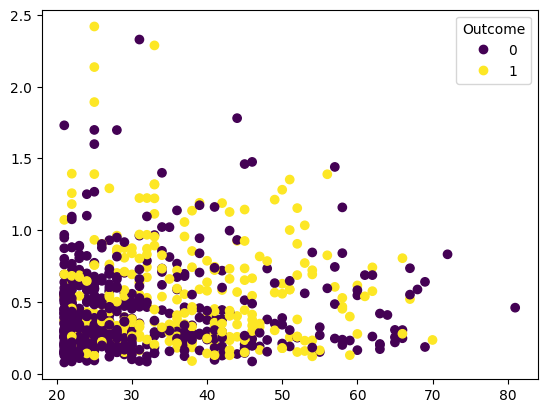

In [177]:
scatter = plt.scatter(df['Age'], df['DiabetesPedigreeFunction'], c=df['Outcome'])
plt.legend(*scatter.legend_elements(), title='Outcome')

In [ ]:
import statistics

class MyKNearestNeighbors():
    def __init__(self, k = 5, ):
        self.k = k
    
    # Calculate the euclidean distance bewteen 2 points, a and b must be numpy arrays or similar
    def distance(self, a, b):
        dis = np.sqrt(np.sum((np.array(a)-np.array(b))**2))
        return dis

    # Save all trainnig samples 
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    # Check for the neighbors and determine which are the closes ones
    def check_neighbors(self, t):
        dis = []
        m = self.X_train.shape[0]
        for i in range(m):
            dis.append((self.distance(self.X_train.iloc[i], t), self.y_train.iloc[i]))
        dis.sort(key= lambda x: x[0])
        dis = [a[1] for a in dis]
        return statistics.mode(dis[:self.k])

    def predict(self, X_test):
        pred = []
        m = X_test.shape[0]
        for i in range(m):
            pred.append(self.check_neighbors(X_test.iloc[i]))
        return pred
        

In [179]:
X = df.drop(columns='Outcome').copy()
y = df['Outcome'].copy()

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = MyKNearestNeighbors()
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)

In [195]:
my_acc = np.sum(pred == y_test) / y_test.shape[0]
print(f'The accuracy of my model is: {my_acc}')

The accuracy of my model is: 0.734375


In [191]:
from sklearn.neighbors import KNeighborsClassifier

sk_model = KNeighborsClassifier()
sk_model.fit(X_train, y_train)

KNeighborsClassifier()

In [192]:
sk_pred = sk_model.predict(X_test)

In [196]:
sk_acc = np.sum(sk_pred == y_test) / y_test.shape[0]
print(f'The accuracy of sk model is: {sk_acc}')

The accuracy of sk model is: 0.734375
